1. 使用pytorch搭建神经网络模型，实现对KMNIST数据集的训练。
https://pytorch.org/vision/stable/generated/torchvision.datasets.KMNIST.html#torchvision.datasets.KMNIST


In [ ]:
# 导入KMNIST数据集
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.transforms.v2 import ToTensor #转换图像数据为张量
from torchvision.datasets import KMNIST # 导入KMNIST数据集
from torch.utils.data import DataLoader # 导入DataLoader数据加载器

In [ ]:
# 定义超参数
LR = 0.001
BATCH_SIZE = 128
epochs = 150

In [4]:
# 加载数据集
train_dataset = KMNIST(root='./data', train=True, download=True, transform=ToTensor())
test_dataset = KMNIST(root='./data', train=False, download=True, transform=ToTensor())


100%|██████████| 18.2M/18.2M [00:55<00:00, 327kB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 786kB/s]
100%|██████████| 3.04M/3.04M [00:12<00:00, 239kB/s]
100%|██████████| 5.12k/5.12k [00:00<?, ?B/s]


(1, 28, 28)


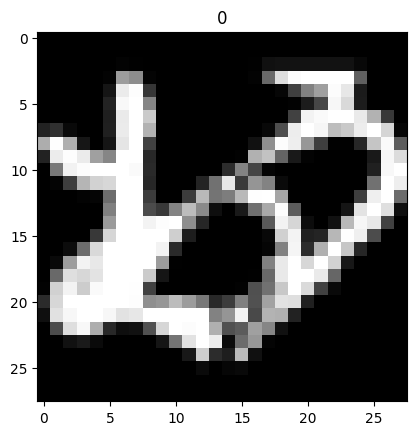

In [12]:
# 查看数据
import matplotlib.pyplot as plt
img, label = train_dataset[2]
print(img.numpy().shape)
plt.imshow(img.numpy().squeeze(), cmap='gray')
plt.title(label)
plt.show()


In [13]:
# 创建数据加载器
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)


In [ ]:
# 定义模型
model = nn.Sequential(nn.Linear(784, 512), nn.Sigmoid(), nn.Linear(512, 10))

In [15]:
# 损失函数, 优化器
loss_fn = nn.CrossEntropyLoss() # 交叉熵损失函数
optimizer = optim.SGD(model.parameters(), lr=LR) # 随机梯度下降优化器,模型参数更新


In [16]:
# 训练模型
for epoch in range(epochs):

    # 提取训练数据
    for data, target in train_loader:
        # 前向运算
        data = data.reshape(-1, 784)  # 将数据展平
        output = model(data)

        # 计算损失
        loss = loss_fn(output, target)

        # 反向传播
        optimizer.zero_grad()  # 梯度清零
        loss.backward()  # 反向传播,计算梯度
        optimizer.step()  # 更新参数

    # 计算准确率
    print(f"Epoch: {epoch}, Loss: {loss.item()}")

Epoch: 0, Loss: 2.286038875579834
Epoch: 1, Loss: 2.2661590576171875
Epoch: 2, Loss: 2.253910779953003
Epoch: 3, Loss: 2.2287752628326416
Epoch: 4, Loss: 2.218946933746338
Epoch: 5, Loss: 2.1845710277557373
Epoch: 6, Loss: 2.1731929779052734
Epoch: 7, Loss: 2.152825117111206
Epoch: 8, Loss: 2.1243927478790283
Epoch: 9, Loss: 2.0909810066223145
Epoch: 10, Loss: 2.0931808948516846
Epoch: 11, Loss: 2.0806474685668945
Epoch: 12, Loss: 2.0395631790161133
Epoch: 13, Loss: 2.0743539333343506
Epoch: 14, Loss: 2.001107931137085
Epoch: 15, Loss: 1.9631727933883667
Epoch: 16, Loss: 1.9050841331481934
Epoch: 17, Loss: 1.8727174997329712
Epoch: 18, Loss: 1.8893532752990723
Epoch: 19, Loss: 1.8008995056152344
Epoch: 20, Loss: 1.783116340637207
Epoch: 21, Loss: 1.7509440183639526
Epoch: 22, Loss: 1.7533539533615112
Epoch: 23, Loss: 1.6904412508010864
Epoch: 24, Loss: 1.7179423570632935
Epoch: 25, Loss: 1.7168766260147095
Epoch: 26, Loss: 1.6590547561645508
Epoch: 27, Loss: 1.6181279420852661
Epoch: 2

In [17]:
# 测试模型
correct = 0
total = 0

with torch.no_grad(): # 不计算梯度
    for data, target in test_loader:
        data = data.reshape(-1, 784) # 将数据展平
        output = model(data)     
        _, predicted = torch.max(output, 1) #返回每行最大值和索引
        total += target.size(0) # 累加测试样本数量
        correct += (predicted == target).sum().item()

print(f"Accuracy: {100 * correct / total}")


Accuracy: 63.85
